In [2]:
import os

def parse(fname, proc):
    with open(fname, 'r', encoding = 'utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            nums = list(map(int, line.split(', ')))
            proc(nums)

t3_exists = set()
def proc3(ns):
    t3_exists.add(tuple(ns[:2]))
parse('C:/Users/esultano/Downloads/cpp_solutions.3.2097152.1.2097152.csv', proc3)

with open('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv', 'w', encoding = 'ascii') as f:
    cnt = 0
    def proc2(ns):
        global cnt
        flag = int(tuple(ns[:2]) in t3_exists)
        f.write(f'{ns[0]}, {ns[1]}, {flag}\n')
        if cnt % 500_000 == 0:
            print(round((os.path.getsize('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv') - cnt * 3) /
                os.path.getsize('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.csv') * 100, 1), '%, ', sep = '', end = '', flush = True)
        cnt += 1
    parse('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.csv', proc2)

0.0%, 4.9%, 10.0%, 15.5%, 21.1%, 26.6%, 32.2%, 37.7%, 43.3%, 48.9%, 54.5%, 60.2%, 65.9%, 71.8%, 77.9%, 84.0%, 90.2%, 96.3%, 

In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv', header=None)
df = df.astype(int)
df.head()

,0,1,2
0,3,5,0
1,4,5,0
2,5,13,0
3,6,10,0
4,7,25,0


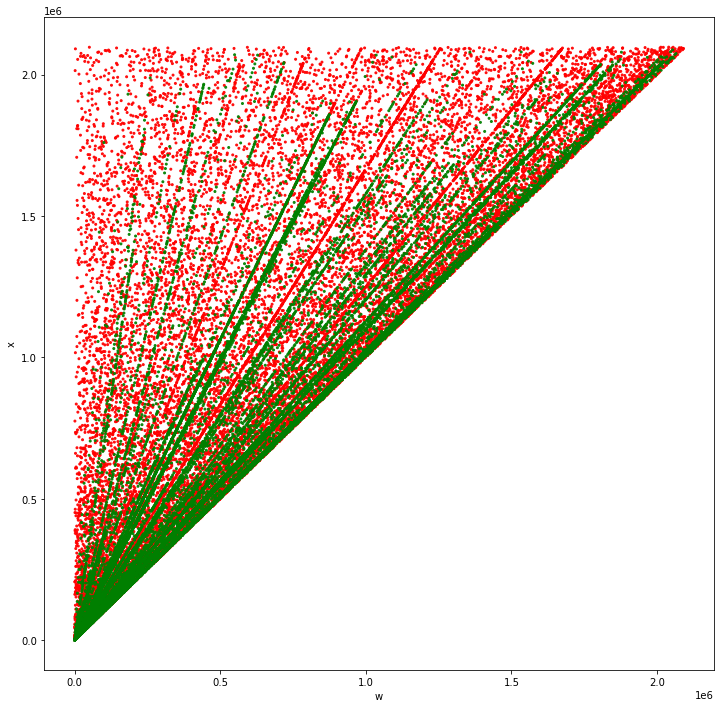

In [13]:
import matplotlib.pyplot as plt

df_plot = df.groupby(df.iloc[:,2]).sample(n=20000, random_state=1)
x = df_plot.iloc[:,0].to_numpy()
y = df_plot.iloc[:,1].to_numpy()
colors = df.iloc[:,2]
color_map = {0:'red', 1:'green'}

f = plt.figure(figsize=(12,12))
plt.scatter(x, y, s=4, alpha=0.9, c=df_plot.iloc[:,2].map(color_map))
plt.xlabel("w")
plt.ylabel("x")
plt.savefig('C:/Users/esultano/Downloads/pairs.png')  
plt.show()

In [3]:
from sympy import gcd
from sympy import factorint

df_cluster = df.groupby(df.iloc[:,2]).sample(n=19999, random_state=1)

# add a fourth column containing the slope
df_cluster[3]=0
df_cluster.iloc[:,3] = df_cluster.iloc[:,1]/df_cluster.iloc[:,0]
#print(df_cluster.iloc[:,predict_col].value_counts())

# add a fifth column containing the GDC(w,x)
# add a sixth and seventh column containing the factorization of w and of x
df_cluster[4]=0
df_cluster[5]=0
df_cluster[6]=0
i=0
for index, row in df_cluster.iterrows():
    df_cluster.iat[i, 4] = gcd(int(row[0]), int(row[1]))
    df_cluster.iat[i, 5] = factorint(int(row[0]))
    df_cluster.iat[i, 6] = factorint(int(row[1]))
    i+=1

df_cluster.head(30)

,0,1,2,3,4,5,6
800200,80870,210262,0,2.600000,16174,"{2: 1, 5: 1, 8087: 1}","{2: 1, 13: 1, 8087: 1}"
4620166,636616,1615816,0,2.538133,136,"{2: 3, 17: 1, 31: 1, 151: 1}","{2: 3, 17: 1, 109: 2}"
3335238,415708,1060517,0,2.551110,1,"{2: 2, 103: 1, 1009: 1}","{137: 1, 7741: 1}"
5533830,820647,1367745,0,1.666667,273549,"{3: 2, 91183: 1}","{3: 1, 5: 1, 91183: 1}"
1843521,203922,339870,0,1.666667,67974,"{2: 1, 3: 2, 11329: 1}","{2: 1, 3: 1, 5: 1, 11329: 1}"
7406658,1313025,1314337,0,1.000999,41,"{3: 1, 5: 2, 7: 1, 41: 1, 61: 1}","{41: 1, 32057: 1}"
4158111,552480,1003672,0,1.816667,9208,"{2: 5, 3: 1, 5: 1, 1151: 1}","{2: 3, 109: 1, 1151: 1}"
7151005,1230968,1538710,0,1.250000,307742,"{2: 3, 153871: 1}","{2: 1, 5: 1, 153871: 1}"
5682413,853740,1039924,0,1.218080,68,"{2: 2, 3: 4, 5: 1, 17: 1, 31: 1}","{2: 2, 17: 1, 41: 1, 373: 1}"
2909424,350760,956968,0,2.728270,296,"{2: 3, 3: 1, 5: 1, 37: 1, 79: 1}","{2: 3, 37: 1, 53: 1, 61: 1}"


In [5]:
df_cluster[(df_cluster.iloc[:,2] == 1)].head(50)

,0,1,2,3,4,5,6
5743540,867510,1048950,1,1.209150,5670,"{2: 1, 3: 6, 5: 1, 7: 1, 17: 1}","{2: 1, 3: 4, 5: 2, 7: 1, 37: 1}"
6657788,1092240,1145964,1,1.049187,444,"{2: 4, 3: 2, 5: 1, 37: 1, 41: 1}","{2: 2, 3: 1, 29: 1, 37: 1, 89: 1}"
41478,4508,5075,1,1.125776,7,"{2: 2, 7: 2, 23: 1}","{5: 2, 7: 1, 29: 1}"
6112536,953550,1049394,1,1.100513,978,"{2: 1, 3: 2, 5: 2, 13: 1, 163: 1}","{2: 1, 3: 1, 29: 1, 37: 1, 163: 1}"
5688262,855036,865215,1,1.011905,10179,"{2: 2, 3: 4, 7: 1, 13: 1, 29: 1}","{3: 3, 5: 1, 13: 1, 17: 1, 29: 1}"
1728457,189344,1449956,1,7.657787,388,"{2: 5, 61: 1, 97: 1}","{2: 2, 37: 1, 97: 1, 101: 1}"
4952163,700672,789728,1,1.127101,736,"{2: 8, 7: 1, 17: 1, 23: 1}","{2: 5, 23: 1, 29: 1, 37: 1}"
1484070,159225,1401375,1,8.801225,75,"{3: 1, 5: 2, 11: 1, 193: 1}","{3: 1, 5: 3, 37: 1, 101: 1}"
4002389,525420,531675,1,1.011905,6255,"{2: 2, 3: 3, 5: 1, 7: 1, 139: 1}","{3: 2, 5: 2, 17: 1, 139: 1}"
5343086,780045,784875,1,1.006192,2415,"{3: 1, 5: 1, 7: 1, 17: 1, 19: 1, 23: 1}","{3: 1, 5: 3, 7: 1, 13: 1, 23: 1}"


In [65]:
# How many pairs are useless and have gcd(w,x)>1?
print(df_cluster[(df_cluster.iloc[:,2] == 0) & (df_cluster.iloc[:,4] > 1) ].shape[0])

# How many pairs are useless and have gcd(w,x)==1?
print(df_cluster[(df_cluster.iloc[:,2] == 0) & (df_cluster.iloc[:,4] == 1) ].shape[0])

# How many pairs are usefull and have gcd(w,x)==1?
print(df_cluster[(df_cluster.iloc[:,2] == 1) & (df_cluster.iloc[:,4] == 1) ].shape[0])

print(df_cluster[(df_cluster.iloc[:,2] == 1) & (df_cluster.iloc[:,4] == 1) ])


18514
1485
24
               0        1  2          3  4
2514946   293844  1105645  1   3.762694  1
41974       4557     5525  1   1.212420  1
6427         952     1073  1   1.127101  1
7757055  1438608  1550833  1   1.078009  1
7091743  1213641  1272809  1   1.048752  1
6337290  1008805  1141933  1   1.131966  1
450722     44321   445729  1  10.056835  1
6618         975     1073  1   1.100513  1
5646883   845767  1300825  1   1.538042  1
97753       9879    10121  1   1.024496  1
2918112   352036   389285  1   1.105810  1
2921152   352495   508177  1   1.441657  1
1947951   217341   822341  1   3.783644  1
3087         533      925  1   1.735460  1
1830         357     1325  1   3.711485  1
215943     21164    25925  1   1.224957  1
26212       3007     5185  1   1.724310  1
550054     54460   156221  1   2.868546  1
2371137   273853  1160965  1   4.239373  1
31845       3567     4625  1   1.296608  1
1544812   166608   884017  1   5.305970  1
487688     48063    99905  1   2.078626 

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split

predict_col = 2
df_train, df_test = train_test_split(df_cluster, test_size=0.3, stratify=df_cluster.iloc[:, predict_col])

col_train = np.r_[0:1,3,4]
y_train = df_train.iloc[:, predict_col]
y_test = df_test.iloc[:, predict_col]

# matrix of explanatory variables includes
X_train = df_train.iloc[:, col_train]
X_test = df_test.iloc[:, col_train]

print(df_cluster.iloc[:,3].value_counts())

1.011905    2047
2.125000    1864
1.969697    1612
1.209150    1330
1.025000    1287
            ... 
1.020546       1
1.188494       1
2.617302       1
1.002978       1
1.266999       1
Name: 3, Length: 9427, dtype: int64


In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
print(LR.score(X_test, y_test))

0.5


In [9]:
from sklearn import svm
from sklearn.svm import SVR

df_reduced = df_cluster.sample(100)
df_train_reduced, df_test_reduced = train_test_split(df_reduced, test_size=0.2, stratify=df_reduced.iloc[:, predict_col])
col_train = np.r_[0:1]
y_train_reduced = df_train_reduced.iloc[:,2]
y_test_reduced = df_test_reduced.iloc[:,2]

# matrix of explanatory variables includes
X_train_reduced = df_train_reduced.iloc[:, col_train]
X_test_reduced = df_test_reduced.iloc[:, col_train]

svc_lin = svm.LinearSVC()
svc_nu = svm.NuSVC(gamma='auto')
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1, cache_size=300)
svr_poly.fit(X_train_reduced, y_train_reduced)

score = svr_poly.score(X_test_reduced, y_test_reduced)
print(score)

In [37]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
print(RF.score(X_test, y_test))

0.8631666666666666


In [38]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(X_train, y_train)
print(DT.score(X_test, y_test))

0.9069166666666667


In [39]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=4, activation="relu", solver="adam", alpha=0.0001, learning_rate="adaptive", max_iter=100).fit(X_train, y_train)
print(MLP.score(X_test, y_test))

0.5235833333333333


In [40]:
from sklearn.ensemble import AdaBoostClassifier

ADBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10).fit(X_train, y_train)
print(ADBoost.score(X_test, y_test))

0.9079166666666667
